# Wrapper Methods

## Use of mlxtend in Wrapper Method


In [1]:
!pip3 install mlxtend

How it works

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached. There are 4 different flavors of SFAs available via the SequentialFeatureSelector:

- Sequential Forward Selection (SFS)
- Sequential Backward Selection (SBS)
- Sequential Forward Floating Selection (SFFS)
- Sequential Backward Floating Selection (SBFS)

## Forward Step Selection

In this wrapping method, it selects one best feature every time and finally it combines all the best features for the best accuracy.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [5]:
data = load_wine()

In [6]:
X = pd.DataFrame(data.data)
y = data.target

In [7]:
X.columns = data.feature_names
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

### Step Forward Selection (SFS)


In [10]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.7s finished

[2021-05-10 15:44:01] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.5s finished

[2021-05-10 15:44:06] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.1s finished

[2021-05-10 15:44:10] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished

[2021-05-10 15:44:14] Features: 4/7 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.4s finished

[202

In [11]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'proline')

In [12]:
sfs.k_feature_idx_

(0, 2, 4, 6, 8, 9, 12)

In [13]:
sfs.k_score_

0.9791666666666666

In [14]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(flavanoids,)",0.0670901,0.0418533,0.024164
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.971825,"(flavanoids, color_intensity)",0.031492,0.0196459,0.0113425
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(magnesium, flavanoids, color_intensity)",0.0225862,0.0140901,0.00813492
4,"(4, 6, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(magnesium, flavanoids, color_intensity, proline)",0.0194714,0.012147,0.00701308
5,"(2, 4, 6, 9, 12)","[0.9444444444444444, 0.9722222222222222, 0.971...",0.972024,"(ash, magnesium, flavanoids, color_intensity, ...",0.0314903,0.0196449,0.011342
6,"(2, 4, 6, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(ash, magnesium, flavanoids, proanthocyanins, ...",0.0194714,0.012147,0.00701308
7,"(0, 2, 4, 6, 8, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0369201,0.0230321,0.0132976


In [15]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    9.7s finished

[2021-05-10 15:45:47] Features: 1/8 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.5s finished

[2021-05-10 15:45:56] Features: 2/8 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.3s finished

[2021-05-10 15:46:04] Features: 3/8 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished

[2021-05-10 15:46:11] Features: 4/8 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    6.9s finished

[202

In [16]:
sfs.k_score_

0.9859126984126985

In [17]:
sfs.k_feature_names_

('magnesium', 'flavanoids', 'color_intensity')

## Backward Step Selection

It is reverse process of Forward Step Selection method, intially it takes all the features and remove one by one every time. Finally it left with required number of features for the best accuracy.

### Step Backward Selection (SBS)

In [20]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 3),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


TypeError: ignored

In [19]:
sbs = sfs
sbs.k_score_

0.9859126984126985

In [ ]:
sbs.k_feature_names_

## Exhaustive Feature Selection


- It is also called as subset selection method.
- It fits the model with each possible combinations of N features.
( y = B0, y = B0 + B1.X1, y = C0 + C1.X2 )
- It requires massive computational power.
- It uses test error to evaluate model performance.

In [21]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [22]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 2002/2002

In [23]:
efs.best_score_

1.0

In [24]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [25]:
efs.best_idx_

(0, 1, 2, 3)

In [26]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


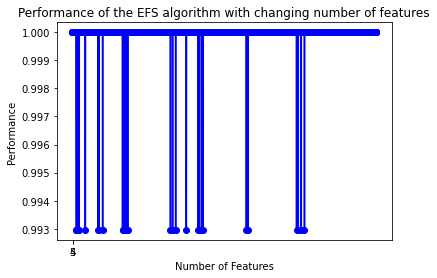

In [27]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
plt.title('Performance of the EFS algorithm with changing number of features')
plt.show()